# Real rocks data set


The data shown here is a small subset of 90000 m (90km) of depth indexed core image sticks from the Norwegian Continental Shelf. GeoProvider sells the entire dataset to interested parties as a petrel ready product and as stand alone database. 

source: https://drive.google.com/drive/u/0/folders/1dUTsx1AvqGzqMTv9FFjgJspv5V-9DfOU

## Data Credits

These depth referenced core images have been made available  to all under the Creative Commons Attribution 4.0 https://creativecommons.org/licenses/by/4.0/legalcode

This data (RealRock) has been made available by a generous sponsoring of GeoProvider http://geoprovider.no/. 
You must acknowledge Geoprovider with full website link in every publication or project using this data. For example 
`Data are © GeoProvider https://geoprovider.no/ and licensed CC-BY 4.0`

The data shown here is a small subset of 90000 m (90km) of depth indexed core image sticks from the Norwegian Continental Shelf. GeoProvider sells the entire dataset to interested parties as a petrel ready product and as stand alone database. Discounts are available for Universities. In addition all public available composite logs have been depth indexed and are available as a petrel ready product.

The data assembly and most of the quality control has been carried out on the freelancing platform freelancer.org and had numerous key contributors. The wages paid in this project and timeline given to the freelancers were always honours and way above minimum standards in the respective countries of the contributors.

Key Contributors were

- Data Nation @Fingerprint (India)
    - Excel working file combination, crossing t and dotting I. Cross checking. Creation of core image database
    - Creation of composite log image database


In [2]:
%pylab inline
import pandas as pd
from tqdm.auto import tqdm
from pathlib import Path
import lasio
from pprint import pprint
import PIL
import shutil
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [3]:
datadir_in = Path('../../data/raw/real-rock-geoprovider/')
datadir_out = Path('../../data/processed/real-rock-geoprovider/')

In [15]:
# load excel sheet
df_csv = pd.read_csv(datadir_in/'RealPore Por Perm Lithology data 1240 Wells Norway public.csv.zip', compression='zip')

df_csv = df_csv.drop(columns=['Data source file name', 'seq numb', 'NPDID', 'Plug or sample number'])

df_csv = df_csv.dropna(how='any', subset=['Well Name', 'main lithology', 'grain size', 'gain density gr/cm3', 'porosity best of available', 'sorting'])

num_cols = ['Measured Depth', 'gain density gr/cm3', 'porosity best of available']
for col in num_cols:
    df_csv[col] = pd.to_numeric(df_csv[col], errors='coerce')

df_csv = df_csv.dropna(how='any', subset=num_cols)
# drop rows with junk

# df_csv = df_csv.dropna(how='any', subset=['NPDID', 'Well Name'])
df_csv['well_name'] = df_csv['Well Name'].str.replace('-', '_')
df_csv['md'] = df_csv['Measured Depth'].astype(int)
df_csv = df_csv.dropna(axis=1, thresh=0.9*len(df_csv))
df_csv

/home/wassname/.pyenv/versions/jup3.7.3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,15,16,17,18,22,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Well Name,Measured Depth,porosity best of available,gain density gr/cm3,Formation description original,Non sorted Transcription,main lithology,clean lithology,color,grain size,rounding,cement,sorting,auxilaries,well_name,md
192,1_2-2,3141.60,20.98,2.65,Sst.Lt-gry.F/M-gr.Ang/Sbrnd.Fr-cmt.M-srt.w-Cl....,Sandstone light grey fine grained medium mediu...,sandstone,sandstone,light grey,fine grained medium grained,angular subrounded,fair cemented,medium sorted,with clay,1_2_2,3141
193,1_2-2,3141.85,19.37,2.65,"Sst.Lt-gry.VF/Crs-gr.Sbrnd.W-cmt.M-srt.w-Cl,Mu...",Sandstone light grey very fine grained coarse ...,sandstone,sandstone,light grey,very fine grained coarse grained,subrounded,well cemented,medium sorted,with clay,1_2_2,3141
195,1_2-2,3141.60,20.98,2.65,Sst.Lt-gry.F/M-gr.Ang/Sbrnd.Fr-cmt.M-srt.w-Cl....,Sandstone light grey fine grained medium mediu...,sandstone,sandstone,light grey,fine grained medium grained,angular subrounded,fair cemented,medium sorted,with clay,1_2_2,3141
196,1_2-2,3141.85,19.37,2.65,"Sst.Lt-gry.VF/Crs-gr.Sbrnd.W-cmt.M-srt.w-Cl,Mu...",Sandstone light grey very fine grained coarse ...,sandstone,sandstone,light grey,very fine grained coarse grained,subrounded,well cemented,medium sorted,with clay,1_2_2,3141
198,1_2-2,3142.12,12.65,2.68,"Sst.Lt-gry.VF/M-gr.Sbrnd.W-cmt.M-srt.w-Cl,Calc...",Sandstone light grey very fine grained medium ...,sandstone,sandstone,light grey,very fine grained medium grained,subrounded,well cemented,medium sorted,with clay,1_2_2,3142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372985,6608_10-E-2-BH,4081.25,26.92,2.64,Sst.Lt-gry.M/Crs/VCrs-gr.Sbang/Sbrnd.P-cmt.M-s...,Sandstone light grey medium medium coarse grai...,sandstone,sandstone,light grey,medium coarse grained very coarse grained,subangular subrounded,poorly cemented,medium sorted,clay (-ey),6608_10_E_2_BH,4081
372986,6608_10-E-2-BH,4081.95,29.80,2.65,a.a.Dom-Crs gr.,as above dominant (-ly) dominant (-ly) coarse ...,sandstone,sandstone,light grey,dominant (-ly) coarse grained,subangular subrounded,poorly cemented,medium sorted,clay (-ey),6608_10_E_2_BH,4081
372987,6608_10-E-2-BH,4082.28,28.75,2.65,Sst.Lt-gry.M/Crs/VCrs-gr.Sbang/Sbrnd.P-cmt.M-s...,Sandstone light grey medium medium coarse grai...,sandstone,sandstone,light grey,medium coarse grained very coarse grained,subangular subrounded,poorly cemented,medium sorted,clay (-ey),6608_10_E_2_BH,4082
372988,6608_10-E-2-BH,4082.77,26.74,2.66,a.a.Tr-Calc.,as above trace calcareous,sandstone,sandstone,light grey,medium coarse grained very coarse grained,subangular subrounded,poorly cemented,medium sorted,clay (-ey),6608_10_E_2_BH,4082


In [16]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182797 entries, 192 to 372989
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Well Name                       182797 non-null  object 
 1   Measured Depth                  182797 non-null  float64
 2   porosity best of available      182797 non-null  float64
 3   gain density gr/cm3             182797 non-null  float64
 4   Formation description original  182797 non-null  object 
 5   Non sorted Transcription        182797 non-null  object 
 6   main lithology                  182797 non-null  object 
 7   clean lithology                 182797 non-null  object 
 8   color                           182168 non-null  object 
 9   grain size                      182797 non-null  object 
 10  rounding                        170488 non-null  object 
 11  cement                          181273 non-null  object 
 12  sorting       

In [18]:
df_depths = df_csv.groupby(['well_name', 'md' ]).first()
df_depths

Well Name  Measured Depth  porosity best of available  \
well_name md                                                           
10_7_1    1561    10_7-1         1561.25                       12.30   
          1562    10_7-1         1562.00                        9.20   
          1563    10_7-1         1563.00                        8.10   
          1564    10_7-1         1564.00                       25.90   
11_5_1    1085    11_5-1         1085.30                       27.01   
...                  ...             ...                         ...   
9_2_A_4   4700   9_2-A-4         4700.00                       14.40   
          4701   9_2-A-4         4701.00                       14.70   
          4702   9_2-A-4         4702.00                       16.60   
          4703   9_2-A-4         4703.00                       15.30   
          4704   9_2-A-4         4704.00                       14.10   

                gain density gr/cm3  \
well_name md                          
10_7_1    1561                 2.64   
          1562                 2.73   
          1563                 2.73   
          1564                 2.65   
11_5_1    1085                 2.61   
...                             ...   
9_2_A_4   4700                 2.65   
          4701                 2.65   
          4702                 2.66   
          4703                 2.66   
          4704                 2.65   

                                   Formation description original  \
well_name md                                                        
10_7_1    1561  Sst.Lt-gry Vf/F-gr Sbang.VW-cmt W-srt Mtrx Ltl...   
          1562  Sst.Lt-gry Vf-gr Sbang.VW-cmt W-srt. Mtrx.w/Ca...   
          1563  Sst.Lt-gry.Vf-gr.Sbang.VW-ant.W-srt.Ltl-C,Calc...   
          1564  Sst.Lt-gry.Vf/F-gr.Sbang.VW-cmt.W-srt.Ltl-C,Ca...   
11_5_1    1085  Sst.MLt-gry.F/Crs-gr.Ang/Sbang.VP-cmt.VP-srt.L...   
...                                                           ...   
9_2_A_4   4700                                               a.a.   
          4701  Sst.Lt-gry.F-gr.Sbang.W/VW-cmt.W-srt.Ltl-Cl,Mi...   
          4702                                           a.a.Lam.   
          4703                                       a.a.w/o-Lam.   
          4704                                               a.a.   

                                         Non sorted Transcription  \
well_name md                                                        
10_7_1    1561  Sandstone light grey very fine grained fine gr...   
          1562  Sandstone light grey very fine grained grained...   
          1563  Sandstone light grey very fine grained grained...   
          1564  Sandstone light grey very fine grained fine gr...   
11_5_1    1085  Sandstone medium light grey fine grained coars...   
...                                                           ...   
9_2_A_4   4700                                          as above    
          4701  Sandstone light grey fine grained grained suba...   
          4702                   as above lamina (-tions  -ated)    
          4703           as above without lamina (-tions  -ated)    
          4704                                          as above    

               main lithology clean lithology              color  \
well_name md                                                       
10_7_1    1561      sandstone       sandstone         light grey   
          1562      sandstone       sandstone         light grey   
          1563      sandstone       sandstone         light grey   
          1564      sandstone       sandstone         light grey   
11_5_1    1085      sandstone       sandstone  medium light grey   
...                       ...             ...                ...   
9_2_A_4   4700      sandstone       sandstone         light grey   
          4701      sandstone       sandstone         light grey   
          4702      sandstone       sandstone         light grey   
          4703      sandst

In [27]:
paths_images = sorted((datadir_in / f'public_core_images_crop_3570m_mid_norway').glob('**/*.jpg'))
len(paths_images)

3965

6406_3_2 3931.0 3932.0


,Well Name,porosity best of available,gain density gr/cm3,Formation description original,Non sorted Transcription,main lithology,clean lithology,color,grain size,rounding,cement,sorting,auxilaries,well_name,md
Measured Depth,,,,,,,,,,,,,,,
3931.25,6406_3-2,13.1,2.66,Sst.Lt-gry.F-gr.Sbang.W-cmt.W-srt.w/Pyr,Sandstone light grey fine grained grained suba...,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,pyrite (-itized.,6406_3_2,3931
3931.50,6406_3-2,13.4,2.66,"AA.Scat-Pyr.w/Sec-Q,Mic.",as above scattered pyrite (-itized. with/ seco...,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,pyrite (-itized.,6406_3_2,3931
3931.70,6406_3-2,12.6,2.66,AA.,as above,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,pyrite (-itized.,6406_3_2,3931
3931.95,6406_3-2,16.7,2.66,AA.,as above,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,pyrite (-itized.,6406_3_2,3931


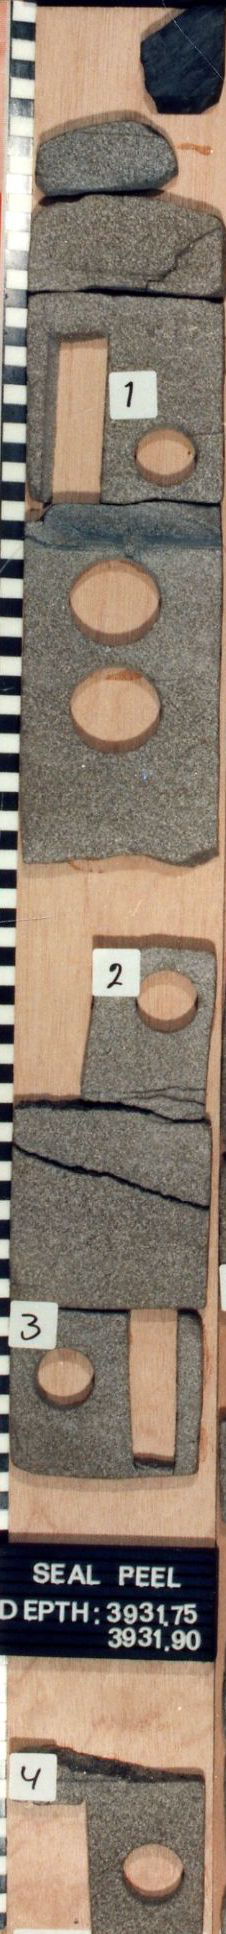

6406_3_2 3932.0 3933.0


,Well Name,porosity best of available,gain density gr/cm3,Formation description original,Non sorted Transcription,main lithology,clean lithology,color,grain size,rounding,cement,sorting,auxilaries,well_name,md
Measured Depth,,,,,,,,,,,,,,,
3932.25,6406_3-2,14.7,2.66,AA.,as above,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,pyrite (-itized.,6406_3_2,3932
3932.45,6406_3-2,14.7,2.66,AA.w/Frac.,as above with/ fractured,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,pyrite (-itized.,6406_3_2,3932
3932.70,6406_3-2,15.0,2.66,AA.w/o-Frac.w/Mic-lam.,as above without fractured with/ micaceous lam...,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,pyrite (-itized.,6406_3_2,3932


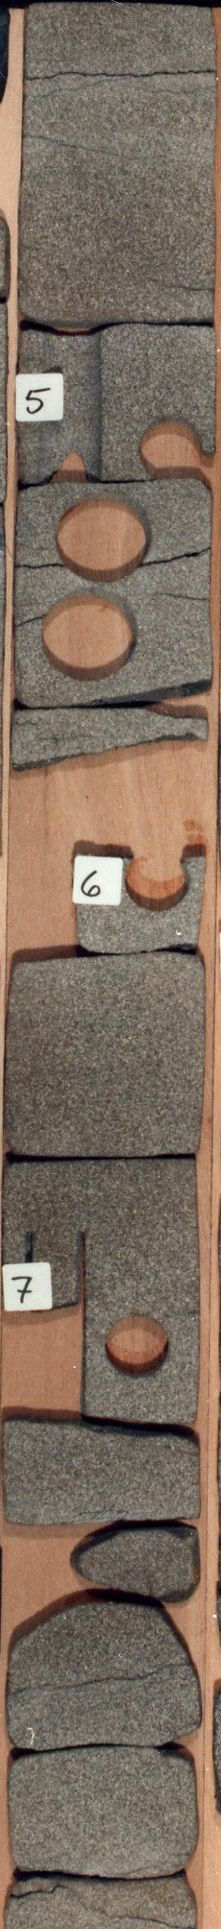

6406_3_2 3933.0 3934.0


,Well Name,porosity best of available,gain density gr/cm3,Formation description original,Non sorted Transcription,main lithology,clean lithology,color,grain size,rounding,cement,sorting,auxilaries,well_name,md
Measured Depth,,,,,,,,,,,,,,,
3933.05,6406_3-2,16.9,2.66,"AA.w/o-Mic-lam,Pyr.",as above without micaceous lamina (-tions -at...,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,NaN,6406_3_2,3933
3933.20,6406_3-2,8.2,2.67,AA.Wh.VW-cmt.w/Calc.,as above white very well cemented with/ calcar...,sandstone,sandstone,white,fine grained,subangular,very well cemented,well sorted,calcareous,6406_3_2,3933
3933.50,6406_3-2,11.1,2.67,"AA.Lt-gry.W-cmt.w/o-Calc.w/Cl,Mic,Pyr.",as above light grey well cemetend without calc...,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,NaN,6406_3_2,3933
3933.75,6406_3-2,12.7,2.67,"AA.incr.-Pyr, Mic.",as above increasing pyrite (-itized. micaceous,sandstone,sandstone,light grey,fine grained,subangular,well cemented,well sorted,NaN,6406_3_2,3933


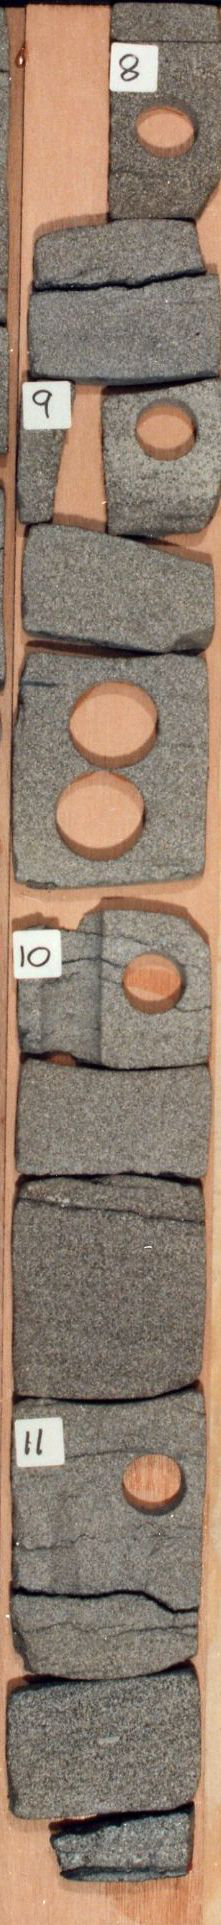

6406_3_2 3935.0 3936.0


,Well Name,porosity best of available,gain density gr/cm3,Formation description original,Non sorted Transcription,main lithology,clean lithology,color,grain size,rounding,cement,sorting,auxilaries,well_name,md
Measured Depth,,,,,,,,,,,,,,,
3935.25,6406_3-2,8.8,2.65,"AA.P-srt.Sec-Q.w/Mic,ltl-Pyr.",as above poorly poorly sorted secondary quartz...,sandstone,sandstone,light grey,fine grained pebble (-ly),subangular,well cemented,poorly sorted,micaceous,6406_3_2,3935
3935.50,6406_3-2,9.1,2.65,AA.,as above,sandstone,sandstone,light grey,fine grained pebble (-ly),subangular,well cemented,poorly sorted,micaceous,6406_3_2,3935
3935.80,6406_3-2,9.7,2.65,AA.w/o-Pyr.,as above without pyrite (-itized.,sandstone,sandstone,light grey,fine grained pebble (-ly),subangular,well cemented,poorly sorted,micaceous,6406_3_2,3935


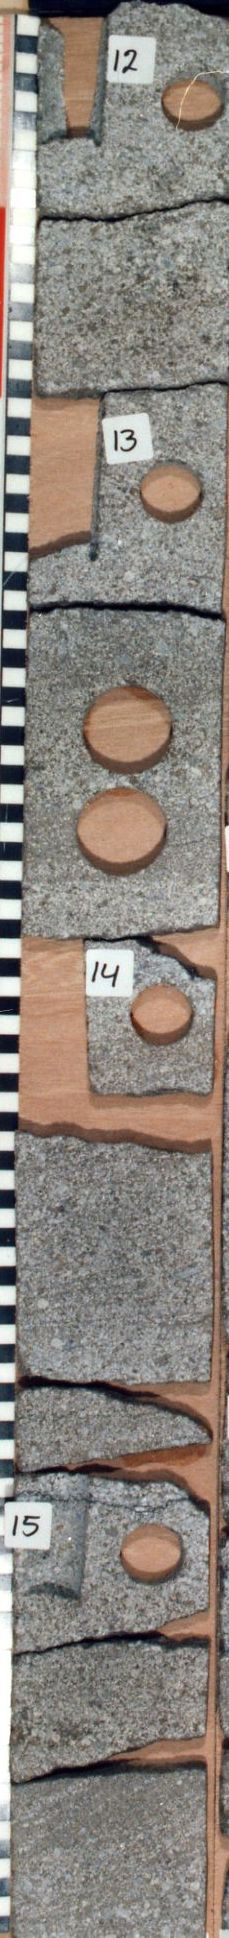

1068

In [19]:
found=0
norows=0
nowell=0
well_names = set(df_csv['well_name'])

( datadir_out/'images').mkdir(parents=True, exist_ok=True)
labels = []
for j, image_path in enumerate(tqdm(paths_images)):
    
    fs =  image_path.stem.split('_')
    well_name = '_'.join(fs[:3])
    depth_a=float(fs[-2].replace(',', '.'))
    depth_b=float(fs[-1].replace(',', '.'))
    
    if well_name in well_names:
        df_well = df_csv[df_csv.well_name==well_name].set_index('Measured Depth')
        df_well = df_well.sort_index()
        rows = df_well[depth_a:depth_b].copy()
        if len(rows)>0:
            found += 1
            if found<5:
                print(well_name, depth_a, depth_b)
                display(rows)
                display(PIL.Image.open(image_path)) 
            
            # take middle row
            label = rows.iloc[len(rows)//2].copy()
            
            # record label
            label['image'] = image_path.name
            labels.append(label)
            
            # move image
            shutil.copy(image_path, datadir_out/'images'/image_path.name)
        else:
            norows+=1
    else:
        nowell+=0
        
len(labels)

In [28]:
found, norows, nowell

(1068, 808, 0)

In [29]:
df_labels = pd.DataFrame(labels)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_labels, random_state=42)
df_train.to_parquet(datadir_out/'train.parquet', compression='gzip')
df_test.to_parquet(datadir_out/'df_test.parquet', compression='gzip')
len(df_train), len(df_test)

(801, 267)

In [ ]:
# def get_header_len(path_log):
#     """Find head length in las file."""
#     for i, line in enumerate(path_log.open()):
#         if line.startswith('~A'):
#             return i

        
# def read_realrocks_data(path_log: Path):
#     """Read las file from realrocks, with qoutes fields that have spaced in"""
    
#     # data is invalid due to spaces, read it seperatly
#     l = lasio.read(path_log,  ignore_data=True)
    
#     # read data
#     skiprows = get_header_len(path_log) + 1
#     null = l.well['NULL'].value
#     df_data = pd.read_table(path_log, skiprows=skiprows, header=None, quoting=0, sep='\s+', na_values=[null])
#     l.set_data(df_data.values, truncate=False)
    
#     return l



In [532]:
# for j, dir_log in enumerate(sorted((datadir_in/'Finalized').glob(f'*/'))):
#     name1 = dir_log.stem.split('_', 2)[-1]
#     if name1 in well_names:
#         name = name1
#         path_log = dir_log / f'{name}_Conditioned.las'
#         path_logim = datadir_in/f'Finalized/ENCL_1_{name}/WB_MULTIPLE_WELLS__ROCK_AND_CORE__CORE_DESC_REPORT_4_ENCL_1.TIF'
#         paths_images = sorted((datadir_in / f'public_core_images_crop_3570m_mid_norway/{name}').glob('*.jpg'))

#         # Load las
#         l = read_realrocks_data(path_log)
#         display(l.curves)
#         df_l = l.df()

#         for i, f in enumerate(paths_images):
#             if i>4:
#                 break
#             depth_a, depth_b = f.stem.split('_')[-2:]
#             depth_a, depth_b = int(float(depth_a.replace(',', '.'))), int(float(depth_b.replace(',', '.')))
            
#             df_well = df_csv[df_csv['well_name']==name]
#             df_well = df_well.set_index('Measured Depth')
#             rows = df_well[depth_a:depth_b]
#             if len(rows):
#                 print(name, depth_a, depth_b)
#                 print(rows)
#                 display(df_l[depth_a:depth_b].iloc[0])
#                 display(PIL.Image.open(f)) 
            
            
            
            
            


#         if j>3:
#             break